In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### All Donations

In [55]:
food_full

,Unnamed: 0,date,company,state,month,day,year,weekday,size,type
0,0,2017-06-21,DoorDash,California,6,21,2017,Wednesday,500.0,food
1,1,2017-06-21,GoFundMe,California,6,21,2017,Wednesday,500.0,other
2,2,2017-06-21,Twitch,California,6,21,2017,Wednesday,1000.0,comm
3,3,2017-06-21,Twitch,California,6,21,2017,Wednesday,1000.0,comm
4,4,2017-06-21,Opendoor,California,6,21,2017,Wednesday,1000.0,fin
5,5,2017-06-21,Braze SF Office,California,6,21,2017,Wednesday,200.0,comm
6,6,2017-06-21,Lever,California,6,21,2017,Wednesday,200.0,soft
7,7,2017-06-22,GoFundMe,California,6,22,2017,Thursday,500.0,other
8,8,2017-06-22,Opendoor,California,6,22,2017,Thursday,1000.0,fin
9,9,2017-06-22,Twitch,California,6,22,2017,Thursday,1000.0,comm


In [52]:
food_full = pd.read_csv("food_full.csv")
food_full["date"] = pd.to_datetime(food_full["date"])
food_full["size"] = food_full["size"].astype("str")
food_full.loc[(food_full["state"] != "California") & (food_full["state"] != "New York"), "state"] = "underdeveloped"
company_num_donation = food_full.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_size = food_full.groupby("company")["size"].first()
company_type = food_full.groupby("company")["type"].first()
company_state = food_full.groupby("company")["state"].first()
company_full = pd.DataFrame({
                        "size": company_size, "type": company_type,
                      
                        "one_donation": company_one_donation, 
                        "state": company_state
                       })
#company["top_contributor"] = company["num_donation"].apply(lambda x: 1 if x >= 50
#                                                          else 0)
#company.loc[company.index == "Imgur", "popular_weekday"] = "Friday"
#company = company[~(company.index == "Curiodysse")]

In [53]:
pd.get_dummies(company_full).to_csv("company_full.csv", sep = ",")

In [54]:
company_full

,one_donation,size,state,type
company,,,,
32BJ SEIU,1,500.0,New York,other
AFIP,1,10.0,underdeveloped,fin
ALL IN,0,10.0,California,food
AT&T Foundry,0,50.0,California,comm
Acxiom,0,5000.0,New York,bus
"Adams & Company Real Estate, LLC",0,200.0,New York,fin
"Addepar, Inc.",0,500.0,New York,fin
Adore Me,1,200.0,New York,sale
Aera Technology Inc.,0,200.0,California,applied


In [36]:
#company.to_csv("avg_week_donation_raw.csv", sep = ",")

In [37]:
#company_processed.to_csv("avg_week_donation.csv")

### Companies with Recorded Pounds

Index(['32BJ SEIU', 'AT&T Foundry', 'Acxiom',
       'Adams & Company Real Estate, LLC', 'Addepar, Inc.',
       'Aera Technology Inc.', 'Airbnb', 'Aramark SF', 'Audentes Therapeutics',
       'Avametric, suite 1001',
       ...
       'Zesty SF', 'Zillow NYC', 'Zinc', 'Zoox', 'Zymergen Office', 'drive.ai',
       'fresh approach', 'illy', 'la brea', 'sweetgreen'],
      dtype='object', name='company', length=183)

In [28]:
company.index.isin(company[company["num_donation"]/company["num_weeks"] >=1].index).astype("int")

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [30]:
#for all companies that made a donation 
food = pd.read_csv("no_isf_outliers")
food["date"] = pd.to_datetime(food["date"])
food["size"] = food["size"].astype("str")
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "underdeveloped"
company_weeks = food.groupby("company")["date"].agg(lambda x: int((max(food["date"]) - min(x))/np.timedelta64(1, "W")))+ 1
company_tot_donation = food.groupby("company")["pounds"].agg(np.sum)
company_num_donation = food.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_pound_per_week = company_tot_donation/company_weeks
company_avg_donation = company_tot_donation/company_num_donation
#company_max_donation = food.groupby("company")["pounds"].agg(np.max)
company_min_donation = food.groupby("company")["pounds"].agg(np.min)
#company_med_donation = food.groupby("company")["pounds"].agg(np.median)
company_size = food.groupby("company")["size"].first()
company_type = food.groupby("company")["type"].first()
company_state = food.groupby("company")["state"].first()
company_most_donation_weekday = food.groupby("company")["weekday"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_weekday_frac = food.groupby("company")["weekday"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_max_weekday = food.loc[food.reset_index().groupby("company")["pounds"].idxmax()]["weekday"]
company_max_weekday.index = company_weeks.index
company_first_donation = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"]
company_first_donation.index = company_weeks.index
company_last_donation_weeks = (np.max(food["date"]) - food.groupby("company")["date"].agg(np.max)).apply(lambda x: x.days)//7
company_last_donation = food[food.groupby("company").date.transform("max") == food["date"]].groupby("company").first()["pounds"]
company_most_donation_month = food.groupby("company")["month"].agg(lambda x: np.argmax(x.value_counts())).astype("str")
company_most_donation_month_frac = food.groupby("company")["month"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_start_month = pd.to_datetime(food.groupby("company")["date"].agg(np.min)).dt.month.astype("str")
company = pd.DataFrame({#"tot_donation": company_tot_donation, 
                       "num_donation": company_num_donation, 
                        "num_weeks": company_weeks, 
                       "last_donation_weeks": company_last_donation_weeks,
                        "last_donation": company_last_donation,
                        "avg_donation": company_avg_donation, 
                        "week_donation": company_pound_per_week,
                      # "max_donation": company_max_donation, 
                       # "med_donation": company_med_donation,
                        "min_donation": company_min_donation,
                        "size": company_size, "type": company_type,
                       "popular_weekday": company_most_donation_weekday,
                        "popular_month": company_most_donation_month,
                       "popular_weekday_frac": company_most_donation_weekday_frac,
                        "popular_month_frac": company_most_donation_month_frac,
                       #"max_pound_weekday": company_max_weekday, 
                        "start_month": company_start_month,
                        "multi_donor": 1 -  company_one_donation, 
                        "state": company_state
                       })
top_contributors =  company[company["num_donation"]/company["num_weeks"] >=1].index
company["top_contributor"] = company.index.isin(top_contributors).astype("int")
company = company.loc[~(company.index == "Imgur"), :]
company = company[~(company.index == "Curiodysse")]

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [31]:
pd.get_dummies(company).columns

Index(['avg_donation', 'last_donation', 'last_donation_weeks', 'min_donation',
       'multi_donor', 'num_donation', 'num_weeks', 'popular_month_frac',
       'popular_weekday_frac', 'week_donation', 'top_contributor',
       'popular_month_1', 'popular_month_10', 'popular_month_11',
       'popular_month_12', 'popular_month_2', 'popular_month_3',
       'popular_month_4', 'popular_month_5', 'popular_month_6',
       'popular_month_7', 'popular_month_8', 'popular_month_9',
       'popular_weekday_Friday', 'popular_weekday_Monday',
       'popular_weekday_Thursday', 'popular_weekday_Tuesday',
       'popular_weekday_Wednesday', 'size_10.0', 'size_1000.0', 'size_10000.0',
       'size_10001.0', 'size_200.0', 'size_50.0', 'size_500.0', 'size_5000.0',
       'start_month_1', 'start_month_10', 'start_month_11', 'start_month_12',
       'start_month_2', 'start_month_3', 'start_month_4', 'start_month_5',
       'start_month_6', 'start_month_7', 'start_month_8', 'start_month_9',
       'state_

In [32]:
pd.get_dummies(company).to_csv("company_with_donation.csv", sep = ",")

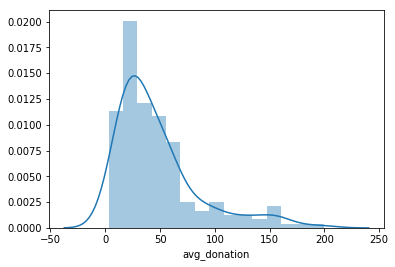

In [49]:
sns.distplot(company[company["avg_donation"] <=200]["avg_donation"])

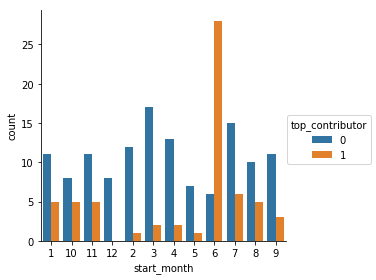

In [9]:
sns.factorplot(x = "start_month", hue = "top_contributor", data = company, kind = "count")

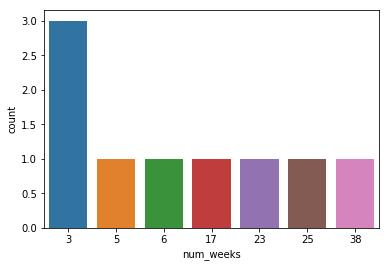

In [10]:
sns.countplot(company[(company["num_donation"] == 3)]["num_weeks"])